In [2]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

with open('Trained_models/15_feat_LGBM_model.pkl', 'rb') as file: # import LGBM model
    LGBM_Model = pickle.load(file)

LGBM_Model

LGBMRegressor(boosting_type='dart', min_child_weight=1.0, n_estimators=300,
              num_leaves=16, random_state=4, reg_alpha=0.015, reg_lambda=0.015)

In [3]:
# Import original dataset for standard scalar

datafile = "Dataset_15_feat.xlsx"
df = pd.read_excel(datafile)
X = df.drop(['Experimental_index','DP_Group','Release'],axis='columns')
stdScale = StandardScaler().fit(X)

In [4]:
# Import prediction excel file

datafile = "Prediction.xlsx"
df = pd.read_excel(datafile)
X = df.drop(['Experimental_index','DP_Group','Release','STD'],axis='columns')
Y = df['Release']
G = df['DP_Group']
STD = df['STD']

X_scale=stdScale.transform(X)

In [5]:
y_pred = LGBM_Model.predict(X_scale)

In [6]:
df["predicted_release"] = y_pred
df

,Experimental_index,DP_Group,LA/GA,Polymer_MW,CL Ratio,Drug_Tm,Drug_Pka,Initial D/M ratio,DLC,SA-V,SE,Drug_Mw,Drug_TPSA,Drug_LogP,Time,T=0.25,T=1.0,Release,STD,predicted_release
0,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,0.000000,0.005826,0.007976,0.000000,0.000000,0.000851
1,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,0.166667,0.005826,0.007976,0.003884,0.001019,0.014057
2,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,1.000000,0.005826,0.007976,0.007976,0.001134,0.029734
3,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,3.000000,0.005826,0.007976,0.011727,0.000628,0.045327
4,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,7.000000,0.005826,0.007976,0.017529,0.000281,0.033986
5,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,11.000000,0.005826,0.007976,0.031298,0.001289,0.055115
6,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,15.000000,0.005826,0.007976,0.093609,0.003203,0.095101
7,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,19.000000,0.005826,0.007976,0.609942,0.010562,0.180609
8,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,23.000000,0.005826,0.007976,0.953062,0.023455,0.306409
9,Prediction_1,OLA-PLGA,1,46000,0,208.5,9.96,0.666667,0.2889,73.982971,0.5,434.471,86.37,2.3474,27.000000,0.005826,0.007976,0.961734,0.025791,0.390944


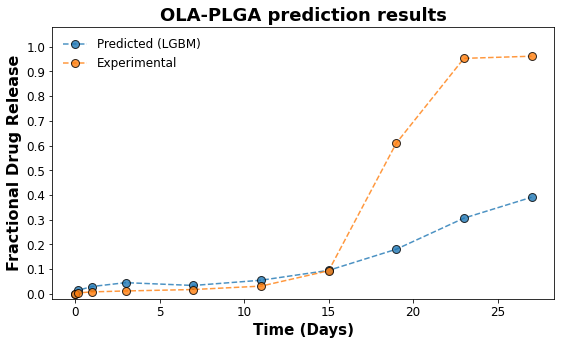

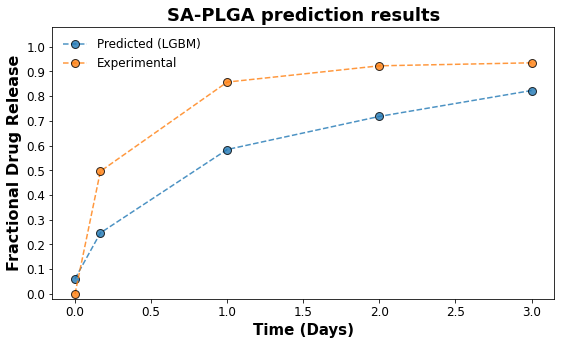

In [7]:
#group dataframe by experimental index
grouped = df.groupby('Experimental_index')

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    X1 = group['Time']
    Y1 = group['predicted_release']
    X2 = group['Time']
    Y2 = group['Release']
    
    dp = group['DP_Group'].iloc[1]

    fig, ax = plt.subplots(figsize=(9,5))
    
    ax.plot(X1, Y1, label='Predicted (LGBM)', linestyle='--', marker='o', markersize=8, 
            markeredgecolor="black", alpha=0.8)
    #ax.plot(X1, lower, color='tab:blue', alpha=0.2)
    #ax.plot(X1, upper, color='tab:blue', alpha=0.2)
    #ax.fill_between(X1, lower, upper, alpha=0.3, label='Variance')
    
    ax.plot(X2, Y2, label='Experimental', linestyle='--', marker='o', markersize=8, 
            alpha=0.8, markeredgecolor="black")
    
    
    # y-axis limits and interval
    ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
    ax.set_xlabel('Time (Days)', fontsize=15, color = 'black', weight='bold')
    ax.set_ylabel('Fractional Drug Release', fontsize=16, color = 'black', weight='bold')
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.set_title(str(dp)+' prediction results', color = 'black', weight='bold', fontsize=18)
    ax.legend(loc='upper left', frameon=False, prop={'size': 12})
    ax.grid(False)
    
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # x-axis and y-axis tick color
    ax.tick_params(colors='black')  # 'both' refers to minor and major axes
    
    #plt.savefig('Figures/Figure_7/LGBM_release_curves'+str(name), dpi=600, format = 'png', transparent=False)
    
    plt.show()

In [8]:
#group dataframe by experimental index
grouped = df.groupby('Experimental_index')

DP_list = []
Time_list = []
EXP_list = []
PRED_list = []
STD_list = []

#generate predicted versus experimental drug release profiles for the test set
for name, group in grouped:
    Time_list.append(group['Time'])
    PRED_list.append(group['predicted_release'])
    EXP_list.append(group['Release'])
    DP_list.append(group['DP_Group'])
    STD_list.append(group['STD'])


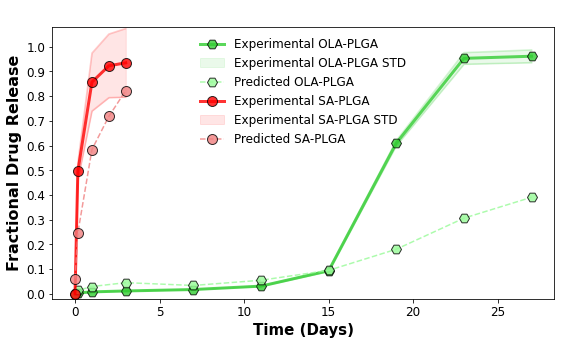

In [18]:
# predcited AND EXP


fig, ax = plt.subplots(figsize=(9,5))

X1 = Time_list[0]
Y1 = EXP_list[0]
X2 = Time_list[0]
Y2 = PRED_list[0]
Y1_err = STD_list[0]

Y1_lower = Y1 - Y1_err
Y1_upper = Y1 + Y1_err

X3 = Time_list[1]
Y3 = EXP_list[1]
X4 = Time_list[1]
Y4 = PRED_list[1]
Y3_err = STD_list[1]

Y3_lower = Y3 - Y3_err
Y3_upper = Y3 + Y3_err


ax.plot(X1, Y1, label= 'Experimental '+str(DP_list[0][0]) , linestyle='-', linewidth=3, marker="H", markersize=10, 
        markeredgecolor="black", alpha=0.8, color = "limegreen")

ax.plot(X1, Y1_lower, color='limegreen', alpha=0.2)
ax.plot(X1, Y1_upper, color='limegreen', alpha=0.2)
ax.fill_between(X1, Y1_lower, Y1_upper, color='limegreen', alpha=0.1, label= 'Experimental '+str(DP_list[0][0])+' STD')

ax.plot(X2, Y2, label='Predicted '+str(DP_list[0][0]), linestyle='--', linewidth=1.5, marker="H", markersize=10, 
        alpha=0.8, markeredgecolor="black", color = "palegreen")

ax.plot(X3, Y3, label= 'Experimental '+str(DP_list[1][10]), linestyle='-', linewidth=3, marker='o', markersize=10, 
        alpha=0.8, markeredgecolor="black", color = "red")

ax.plot(X3, Y3_lower, color='red', alpha=0.2)
ax.plot(X3, Y3_upper, color='red', alpha=0.2)
ax.fill_between(X3, Y3_lower, Y3_upper, color='red', alpha=0.1, label= 'Experimental '+str(DP_list[1][10])+' STD')

ax.plot(X4, Y4, label='Predicted '+str(DP_list[1][10]), linestyle='--', linewidth=1.5, marker='o', markersize=10, 
        alpha=0.8, markeredgecolor="black", color = "lightcoral")


# y-axis limits and interval
ax.set(ylim=(-0.02, 1.08), yticks=np.arange(0,1.08,0.1))
#ax.set(xlim=(-1, 31), xticks=np.arange(0,31,5))
ax.set_xlabel('Time (Days)', fontsize=15, color = 'black', weight='bold')
ax.set_ylabel('Fractional Drug Release', fontsize=16, color = 'black', weight='bold')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.set_title(' ', color = 'black', weight='bold', fontsize=18)
ax.legend(loc='upper center', frameon=False, prop={'size': 12}, labelcolor='black')
ax.grid(False)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# x-axis and y-axis tick color
ax.tick_params(colors='black')  # 'both' refers to minor and major axes

# format graph outline (color)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

plt.savefig('Figures/Figure_7/NATCOMM_EXP_andPRED__LGBM_release_curves_together_2.png', dpi=600, format = 'png', transparent=True)

#plt.show()